In [34]:
import numpy as np   # numpy 패키지 불러오기 
import pandas as pd  # pandas 패키지 불러오기 
import matplotlib  # matplotlib 패키지 불러오기 
import matplotlib.pyplot as plt # 그래프 시각화를 위한 패키지 불러오기
import seaborn as sns  # seaborn 패키지 불러오기 
import warnings        # warings(경고 메시지 없애주는)패키지 불러오기 
from matplotlib import font_manager, rc  # matplotlib안 한글 깨짐 처리
import platform   # 현재 사용하고 있는 시스템 유형을 알려주는 패키지 

# 운영체제에 맞게 폰트 설정
if platform.system() == "Windows":
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False  # 그래프에서 마이너스 기호 표시
warnings.filterwarnings(action='ignore') # 경고 매세지 강제로 없애주는 설정

In [35]:
# 데이터 불러오기
## 추가로 Brand라는 별도 컬럼을 생성 시킴
data1 = pd.read_excel('datas/TV_GRPs_by_models_v2_0507_1.xlsx')
data1.tail()

,년,월,Advertiser,Brand,Product,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+
6289,2020,10월,혼다코리아,혼다,혼다CR-V,30대,27,9939,0.3,9939,0.3,0.0,0.0,0.0,0.0
6290,2020,10월,혼다코리아,혼다,혼다CR-V,40대,27,32944,0.8,27119,0.7,0.0,0.0,0.0,0.0
6291,2020,10월,혼다코리아,혼다,혼다CR-V,50대,27,35197,0.9,25964,0.6,0.0,0.0,0.0,0.0
6292,2020,10월,혼다코리아,혼다,혼다CR-V,60대,27,36975,0.8,19556,0.4,0.1,0.1,0.0,0.0
6293,2020,10월,혼다코리아,혼다,혼다CR-V,개인,27,115055,0.5,82280,0.3,0.0,0.0,0.0,0.0


In [36]:
# 데이터 정보 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6294 entries, 0 to 6293
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   년           6294 non-null   int64  
 1   월           6294 non-null   object 
 2   Advertiser  6294 non-null   object 
 3   Brand       6294 non-null   object 
 4   Product     6294 non-null   object 
 5   연령대         6294 non-null   object 
 6   광고횟수        6294 non-null   int64  
 7   시청자수        6294 non-null   int64  
 8   GRP         6294 non-null   float64
 9   도달자수        6294 non-null   int64  
 10  도달율 1+      6294 non-null   float64
 11  도달율 3+      6294 non-null   float64
 12  도달율 5+      6294 non-null   float64
 13  도달율 7+      6294 non-null   float64
 14  도달율 9+      6294 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 737.7+ KB


In [37]:
# 연도별 광고 갯수 
pd.DataFrame(data1['년'].value_counts()).sort_index()

,년
2016,1188
2017,1254
2018,1332
2019,1302
2020,1044
2021,174


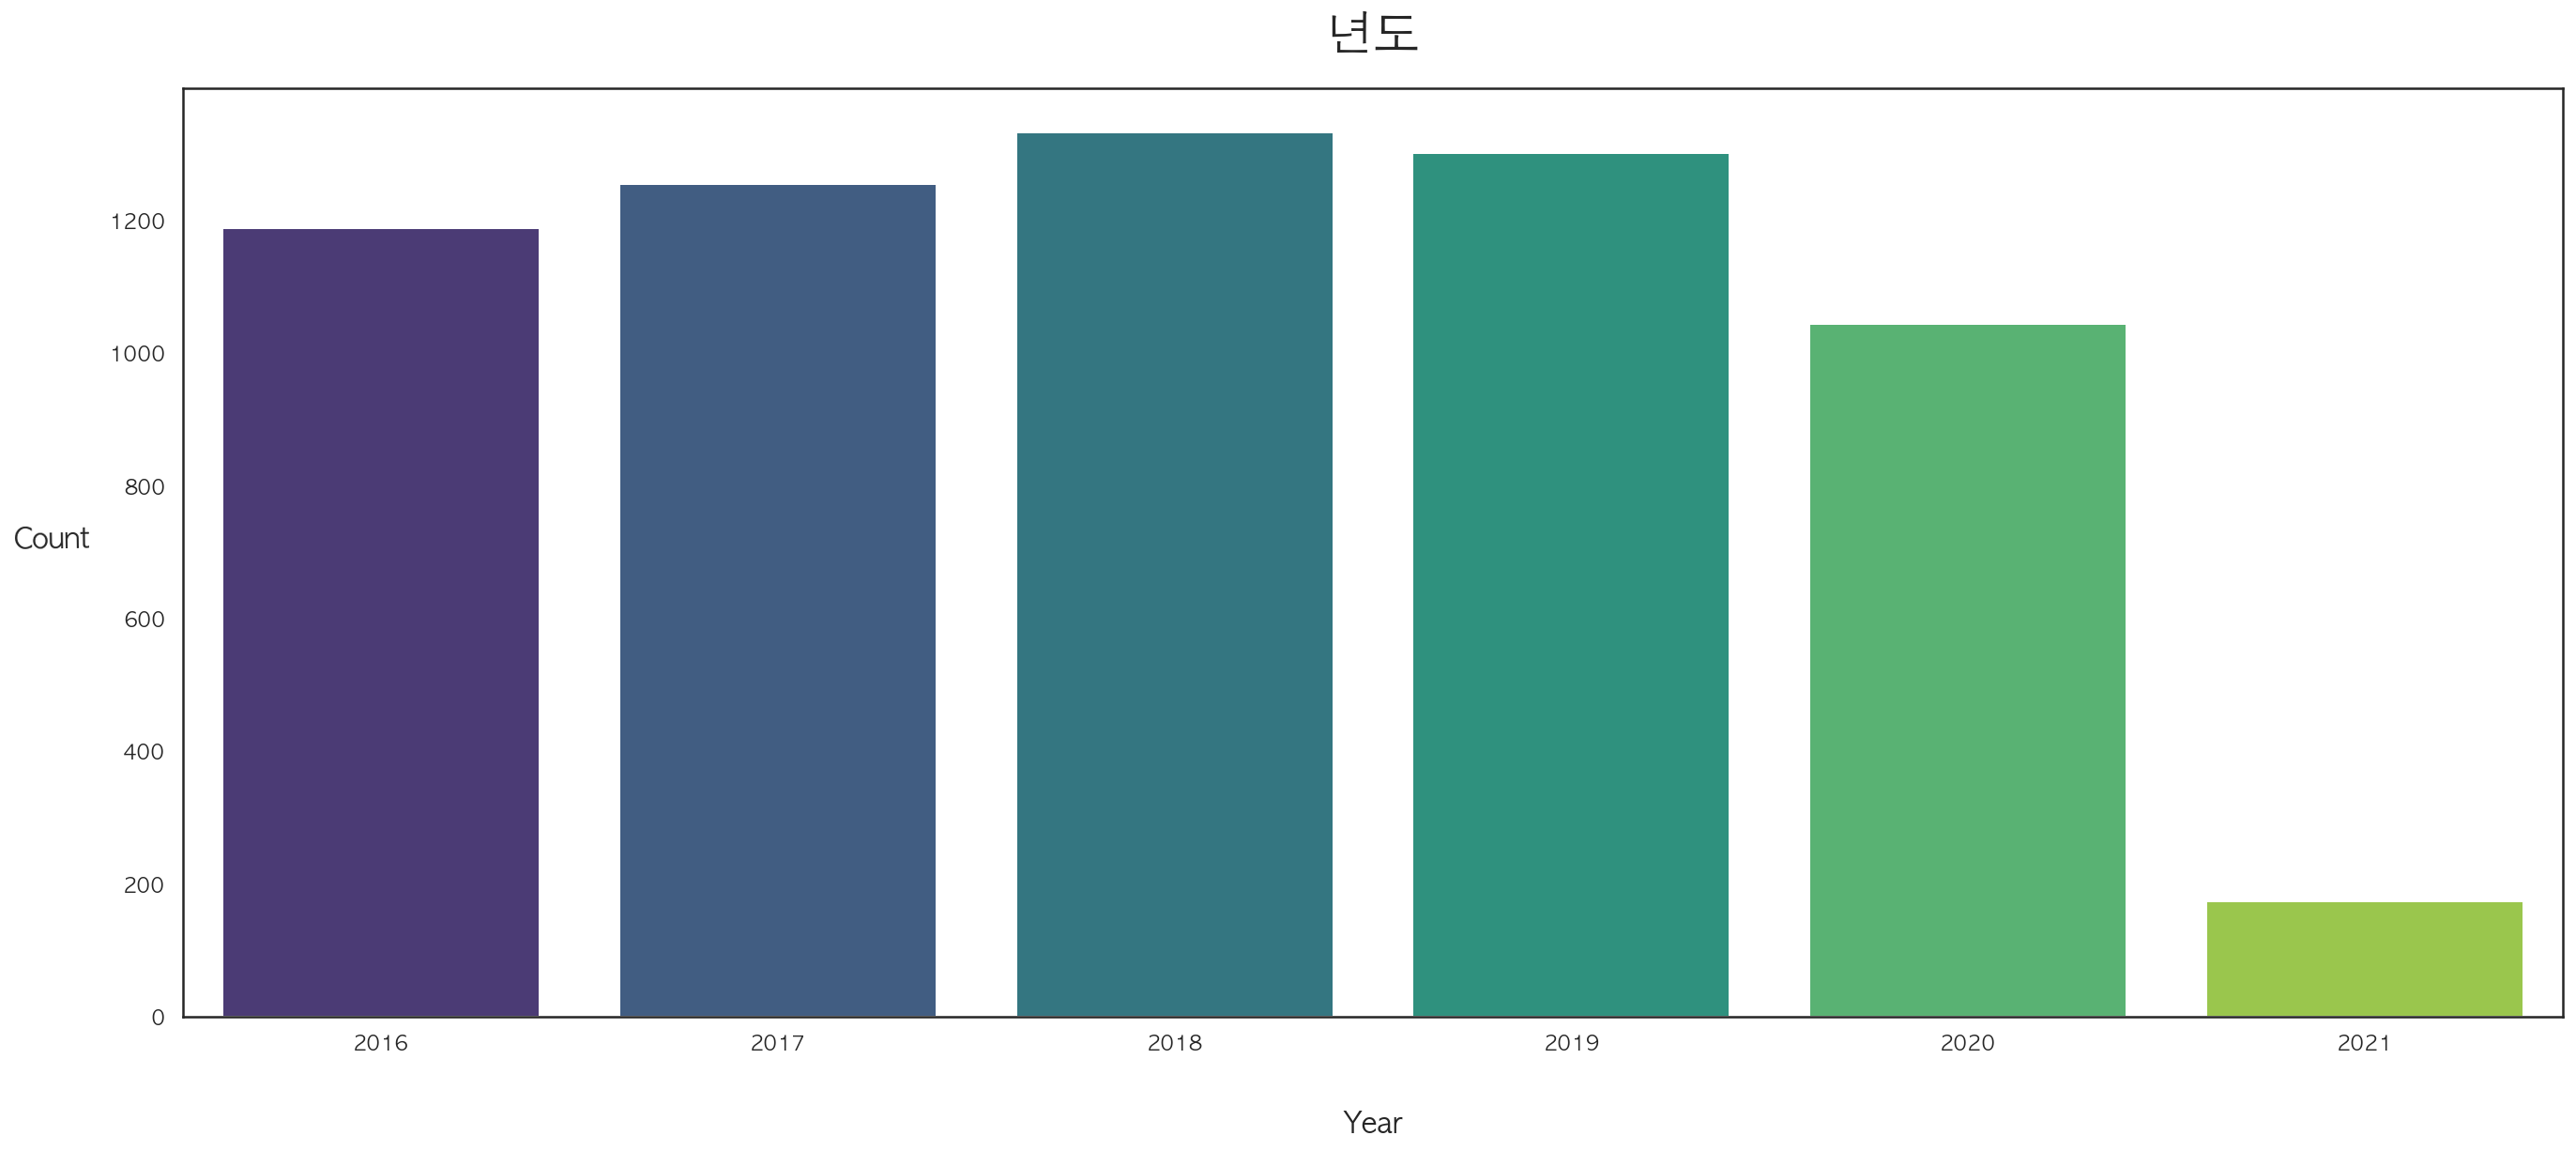

In [38]:
# 그래프로 표현 
%matplotlib inline
plt.figure(figsize=(50, 20))     
plt.subplot(221)  

sns.barplot(data=pd.DataFrame(data1['년'].value_counts()).sort_index().T,
           palette='viridis', ci=False)     

plt.title('년도', fontsize=25, y=1.03)       
plt.xlabel('Year', fontsize=15, labelpad=30)                         
plt.ylabel('Count', fontsize=15, rotation=1, labelpad=30)  

plt.show()

- 전체적으로 2018년과 2019년도에 광고가 많이 발생하였다. (해당 데이터는 아직 전처리를 완전히 다 하지 않은 상태이므로 해당 사항을 감안하고 보야아함)

In [39]:
# 전체 (2016년 ~ 2021년) 월별 광고횟수
pd.DataFrame(data1['월'].value_counts()).sort_index()

,월
01월,504
02월,540
03월,594
04월,600
05월,564
06월,606
07월,540
08월,420
09월,486
10월,570


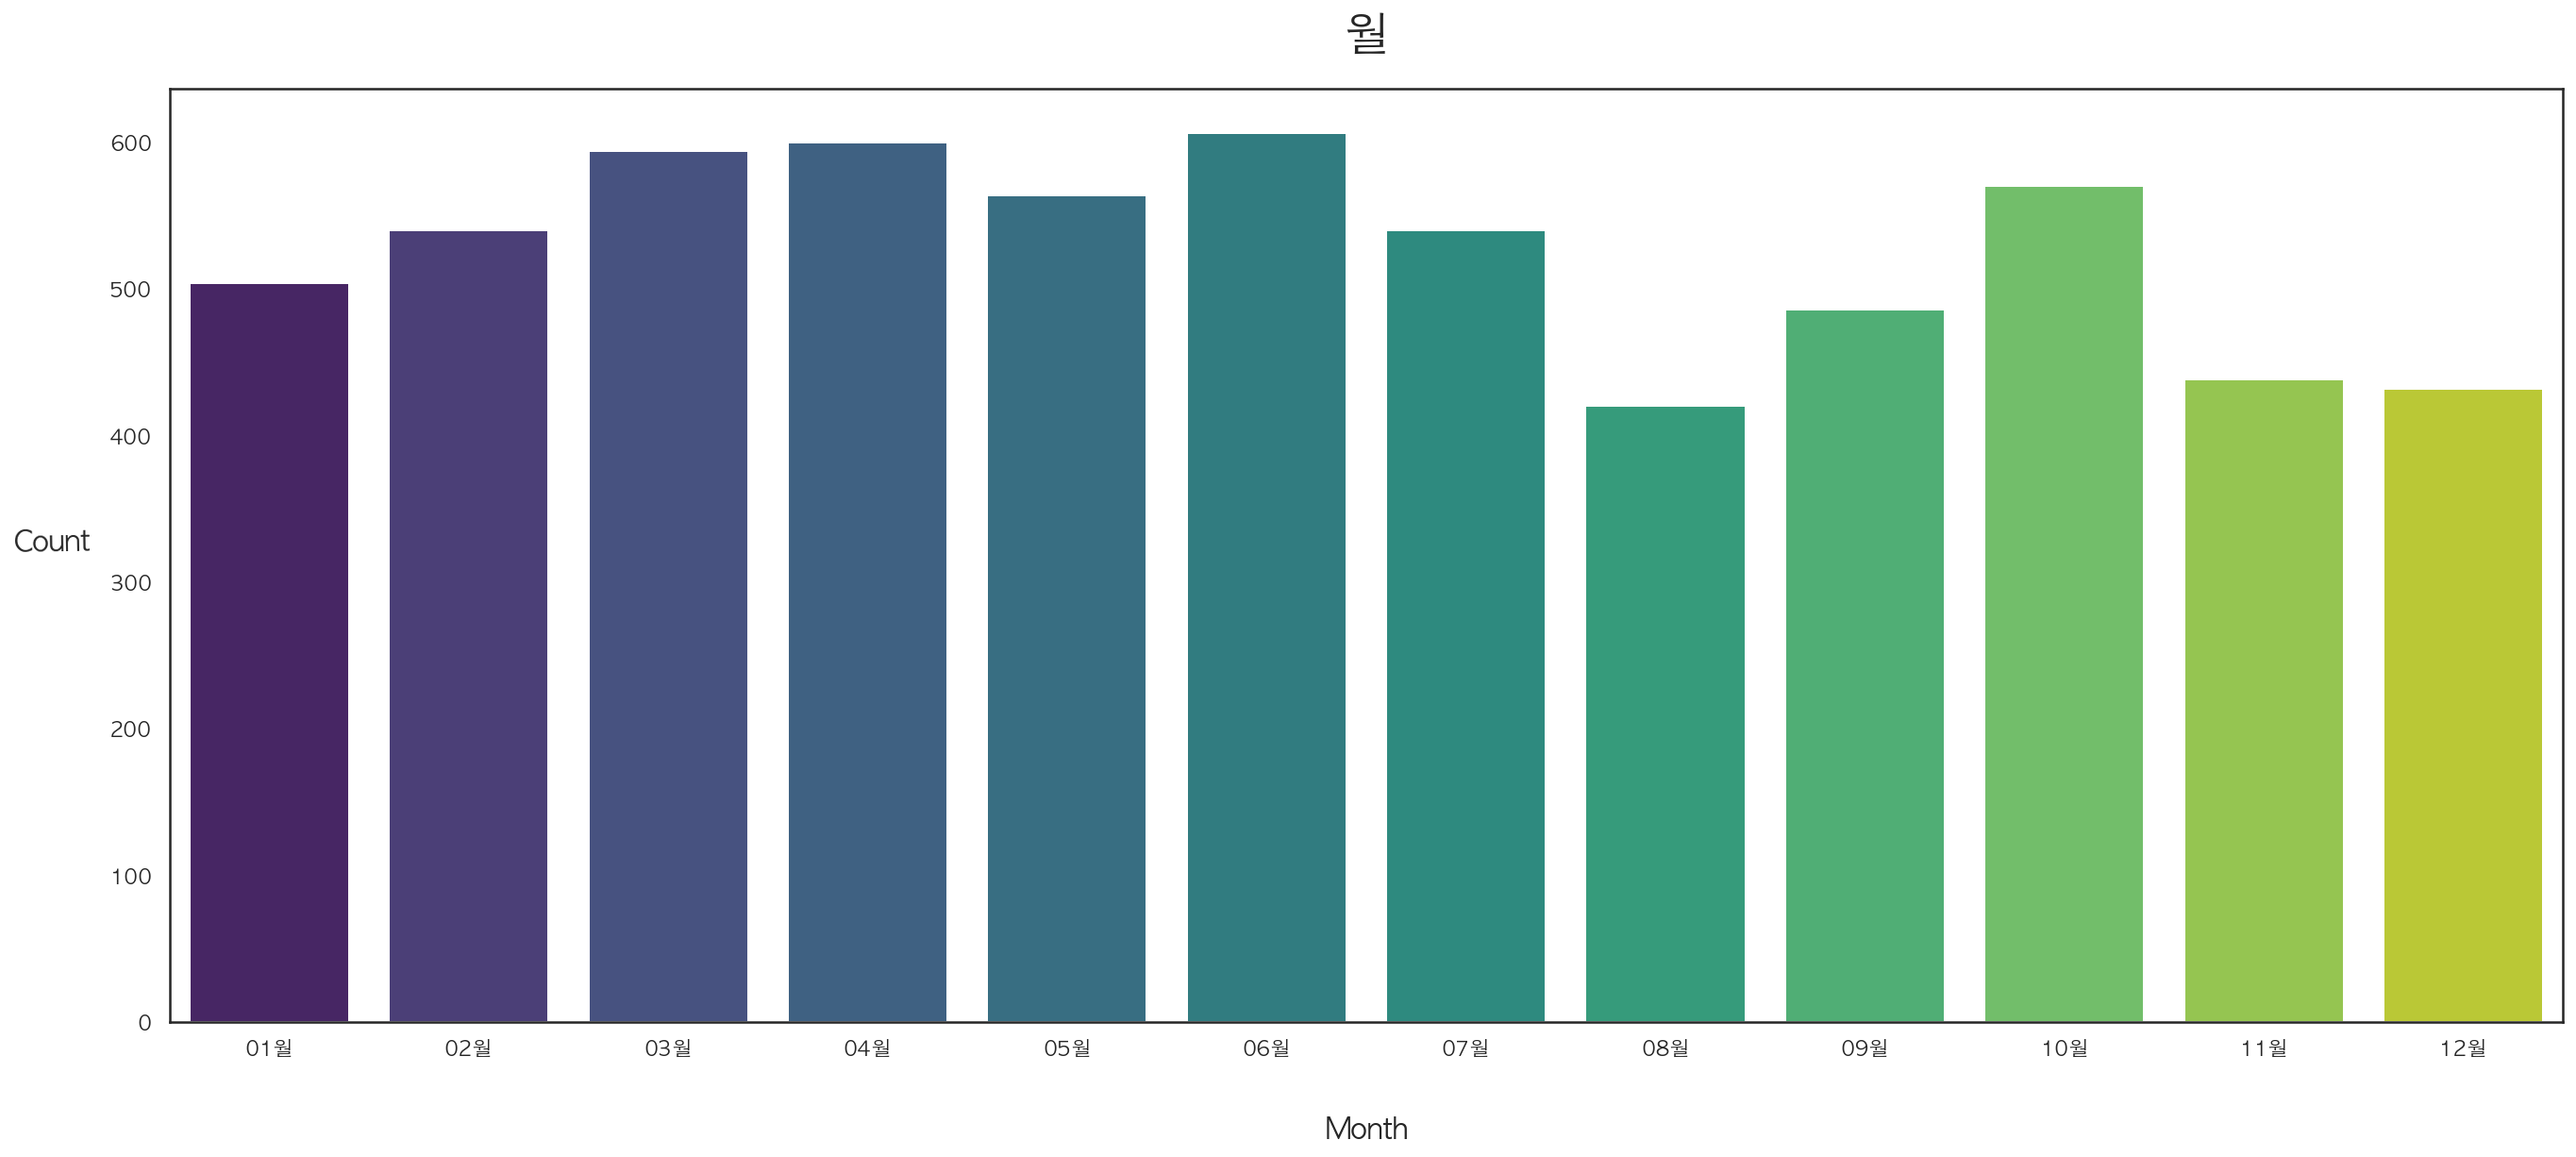

In [40]:
%matplotlib inline
plt.figure(figsize=(50, 20))     
plt.subplot(221)  

sns.barplot(data=pd.DataFrame(data1['월'].value_counts()).sort_index().T,
           palette='viridis', ci=False)     

plt.title('월', fontsize=25, y=1.03)       
plt.xlabel('Month', fontsize=15, labelpad=30)                         
plt.ylabel('Count', fontsize=15, rotation=1, labelpad=30)  

plt.show()

- 월별로 보았을 때 가장 많은 달은 6월이며 3월 4월 10월 순으로 광고 횟수가 많음

In [41]:
pd.DataFrame(data1['Advertiser'].value_counts())

,Advertiser
한국토요타자동차,990
볼보자동차코리아,618
한불모터스,492
BMW코리아,486
재규어랜드로버코리아,444
FMK,414
아우디코리아,372
메르세데스벤츠코리아,366
혼다코리아,336
포드세일즈서비스코리아,330


- 회사별로 브랜드가 중복된 곳이 많아 정리가 필요하여 이렇게 정리해보았다.
  - 한국토요타자동차 : 토요타, 렉서스
  - 볼보자동차코리아 : 볼보 
  - 한불모터스 : 푸조, 시트로엥
  - BMW코리아 : BMW
  - 도이치모터스 : BMW
  - 재규어랜드로버코리아 : 재규어, 랜드로버
  - FMK(효성그룹 계열사) : 마세라티
  - 아우디코리아 : 아우디
  - 아우디폭스바겐코리아 : 폭스바겐
  - 포르쉐코리아 : 포르쉐
  - 메르세데스벤츠코리아 : 벤츠
  - 더클래스효성 : 벤츠
  - 혼다코리아 : 혼다
  - 포드세일즈서비스코리아 : 포드, 링컨
  - 지엠아시아퍼시픽지역본부 : 캐딜락
  - 캐딜락코리아 : 캐딜락
  - 지엠코리아 : 캐딜락
  - 에프씨에이코리아 : 지프, 피아트
  - FCA코리아(피아트, 크라이슬러) : 지프
  - 비워크(광고대행업체) : 지프
  - 한국닛산 : 닛산, 인피니티
  - 기흥인터내셔널 : 애스턴마틴

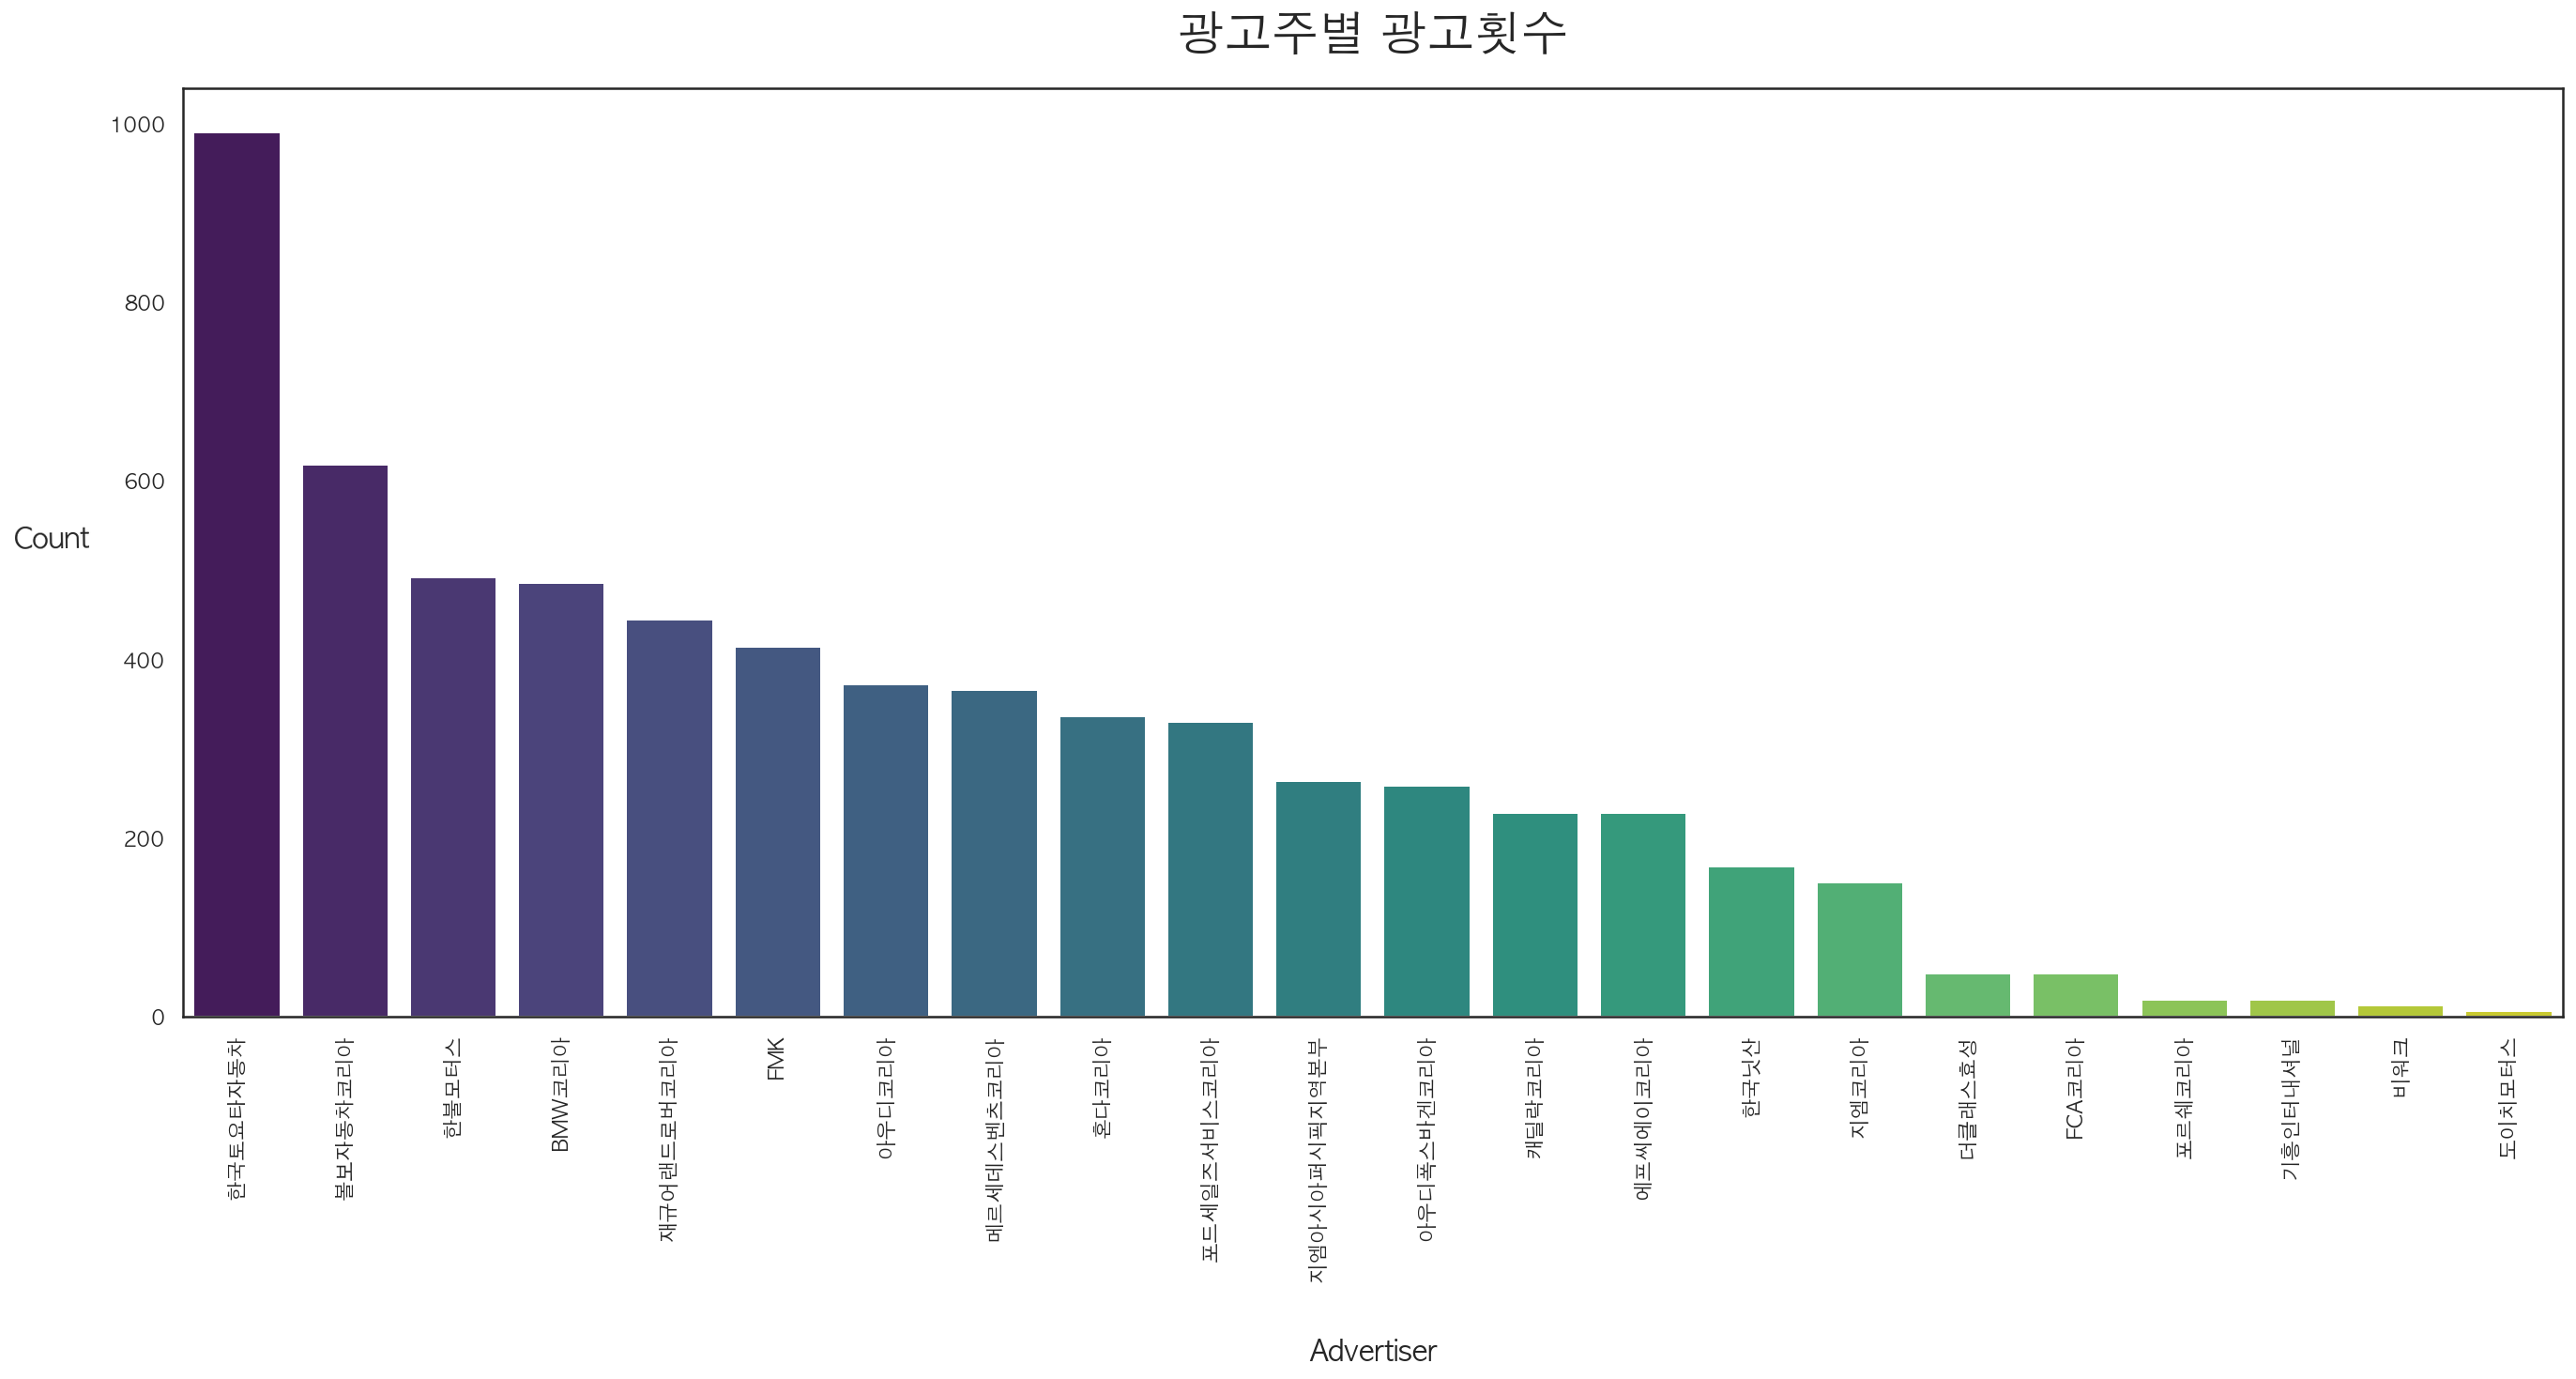

In [42]:
%matplotlib inline
plt.figure(figsize=(50, 20))     
plt.subplot(221)  

sns.barplot(data=pd.DataFrame(data1['Advertiser'].value_counts()).T,
           palette='viridis', ci=False)     

plt.title('광고주별 광고횟수', fontsize=25, y=1.03)       
plt.xlabel('Advertiser', fontsize=15, labelpad=30)                         
plt.ylabel('Count', fontsize=15, rotation=1, labelpad=30)  
plt.xticks(rotation=90)

plt.show()

- 해당 광고주(즉 자동차회사)를 보면서 중복되는 브랜드 및 모델들이 많음. 정리가 필요해 보인다.

In [43]:
pd.DataFrame(data1['Brand'].value_counts())

,Brand
캐딜락,642
볼보,618
렉서스,564
BMW,492
토요타,426
마세라티,414
메르세데스벤츠,414
아우디,372
푸조,360
혼다,336


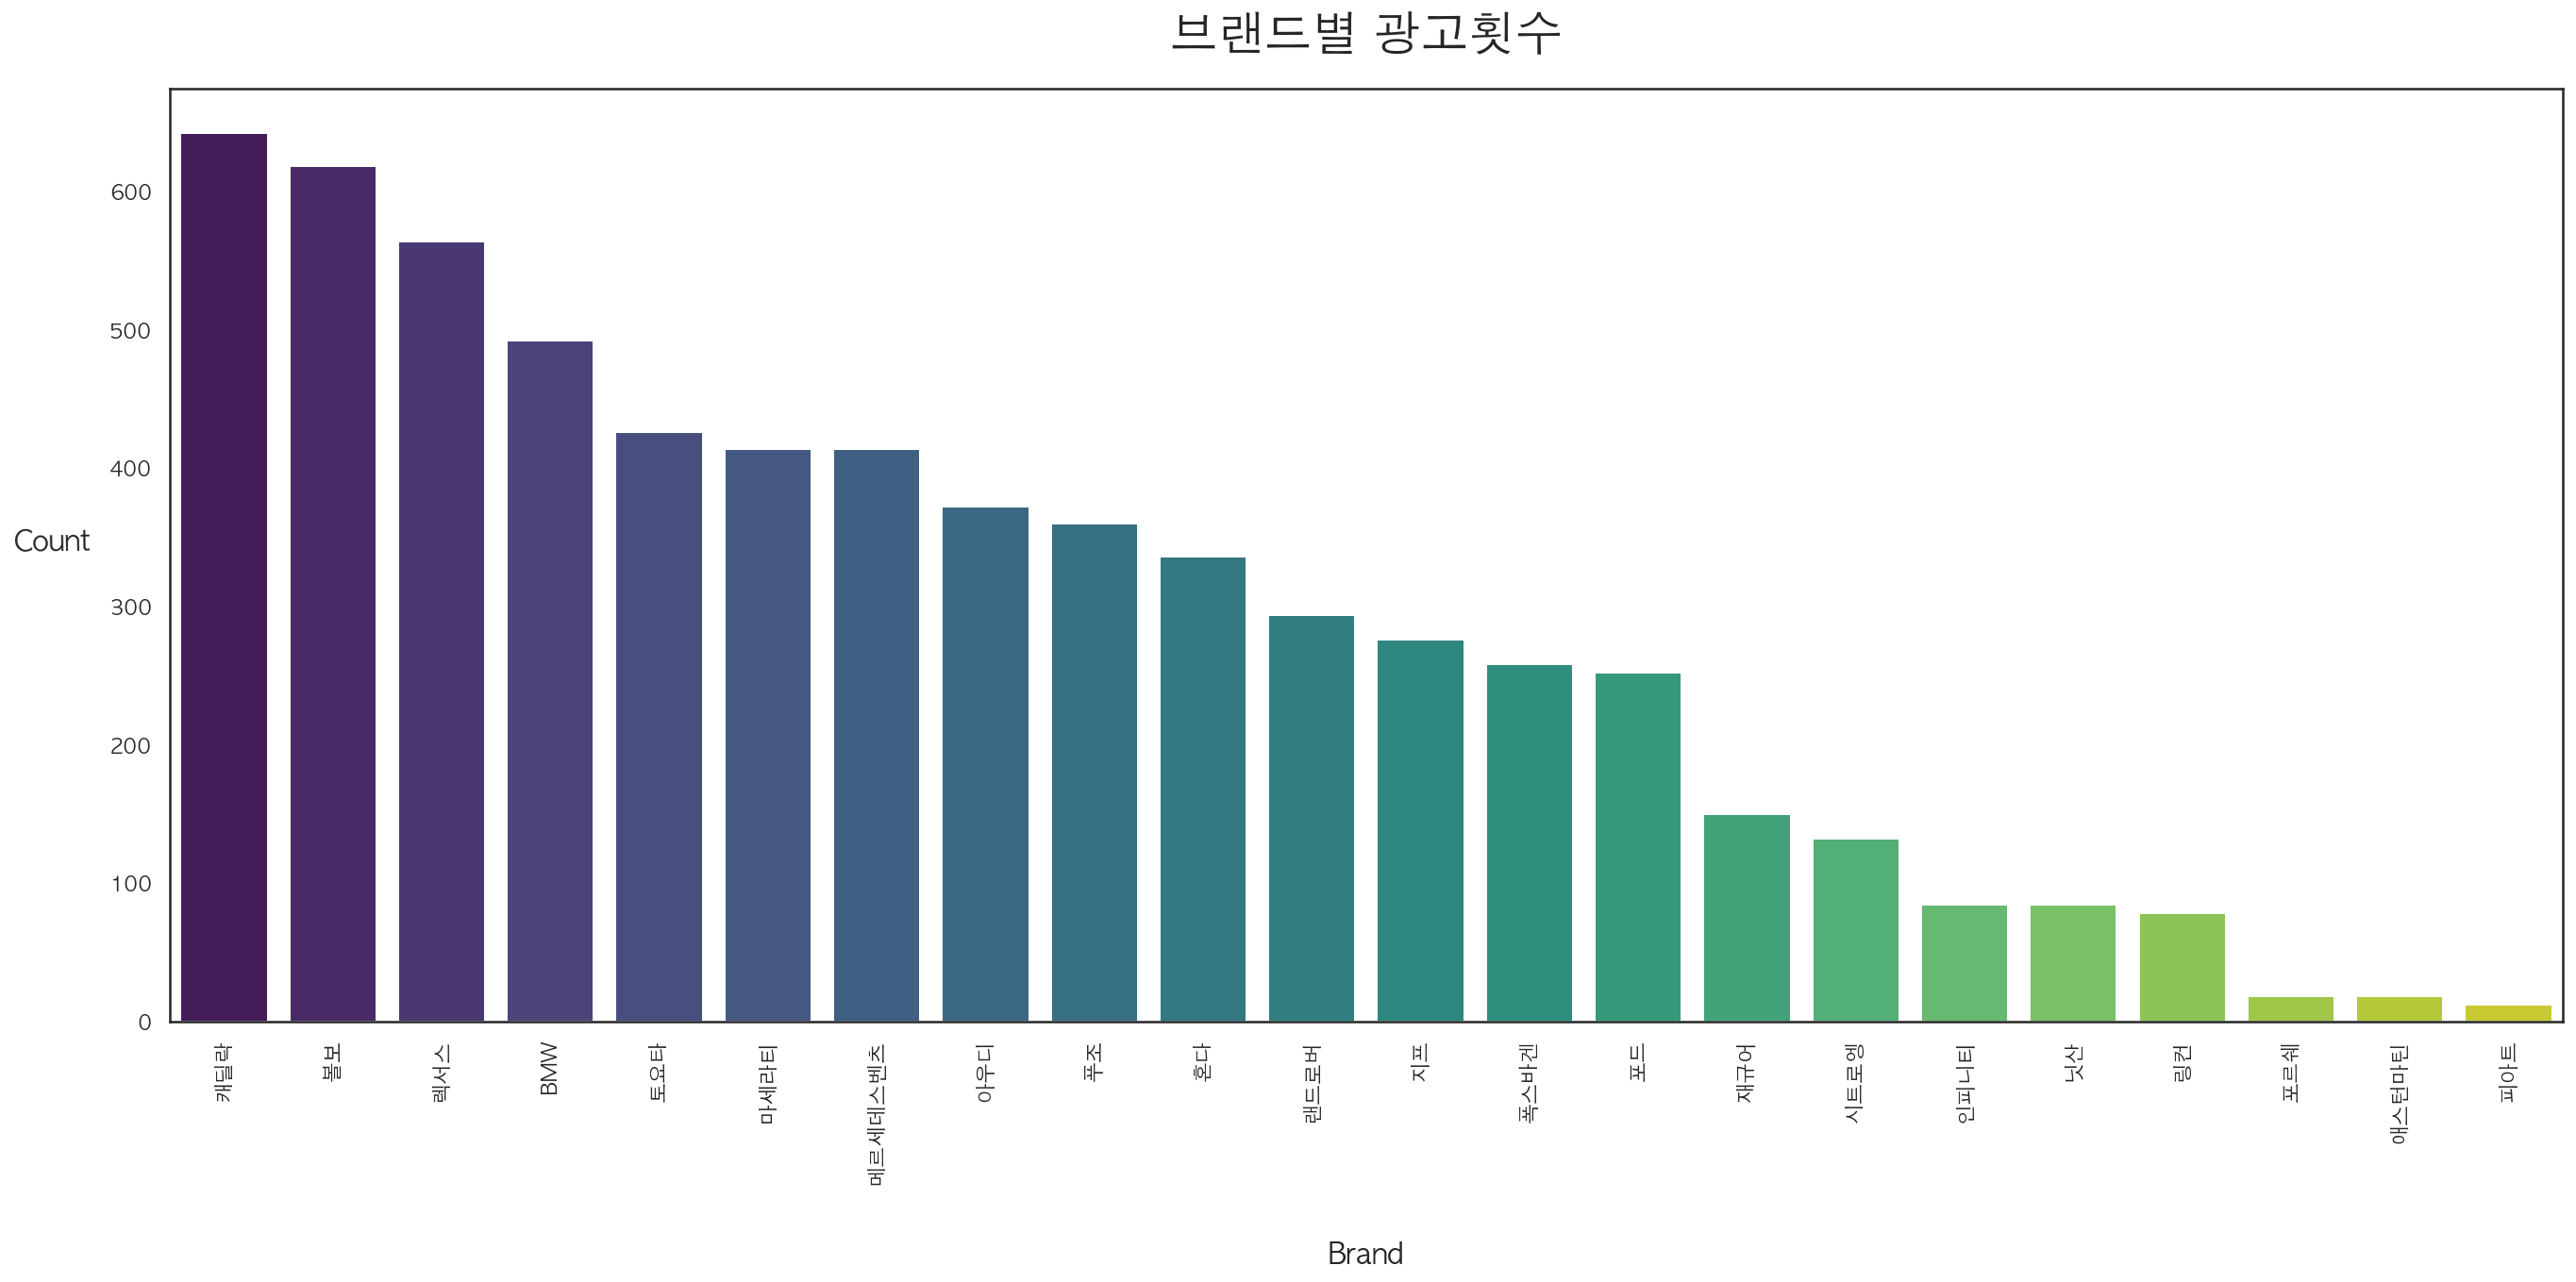

In [44]:
%matplotlib inline
plt.figure(figsize=(50, 20))     
plt.subplot(221)  

sns.barplot(data=pd.DataFrame(data1['Brand'].value_counts()).T,
           palette='viridis', ci=False)     

plt.title('브랜드별 광고횟수', fontsize=25, y=1.03)       
plt.xlabel('Brand', fontsize=15, labelpad=30)                         
plt.ylabel('Count', fontsize=15, rotation=1, labelpad=30)  
plt.xticks(rotation=90)

plt.show()

- 브랜드의 컬럼을 추가해서 브랜드별로 정리하고 확인한 결과 한국 토요타회사에서 광고를 많이 한것 과 달리 캐딜락과 볼보 광고가 많음. 
- 하지만 렉서스와 토요타를 같이 합쳐보면 역시 토요타가 많다.

In [45]:
pd.DataFrame(data1['Product'].value_counts())

,Product
FMK마세라티기블리,210
볼보XC90,198
포드익스플로러,168
혼다ACCORD,138
지엠캐딜락XT5,138
...,...
포드링컨MKZ,6
기흥애스턴마틴밴티지,6
아우디폭스바겐제타,6
벤츠EQ,6


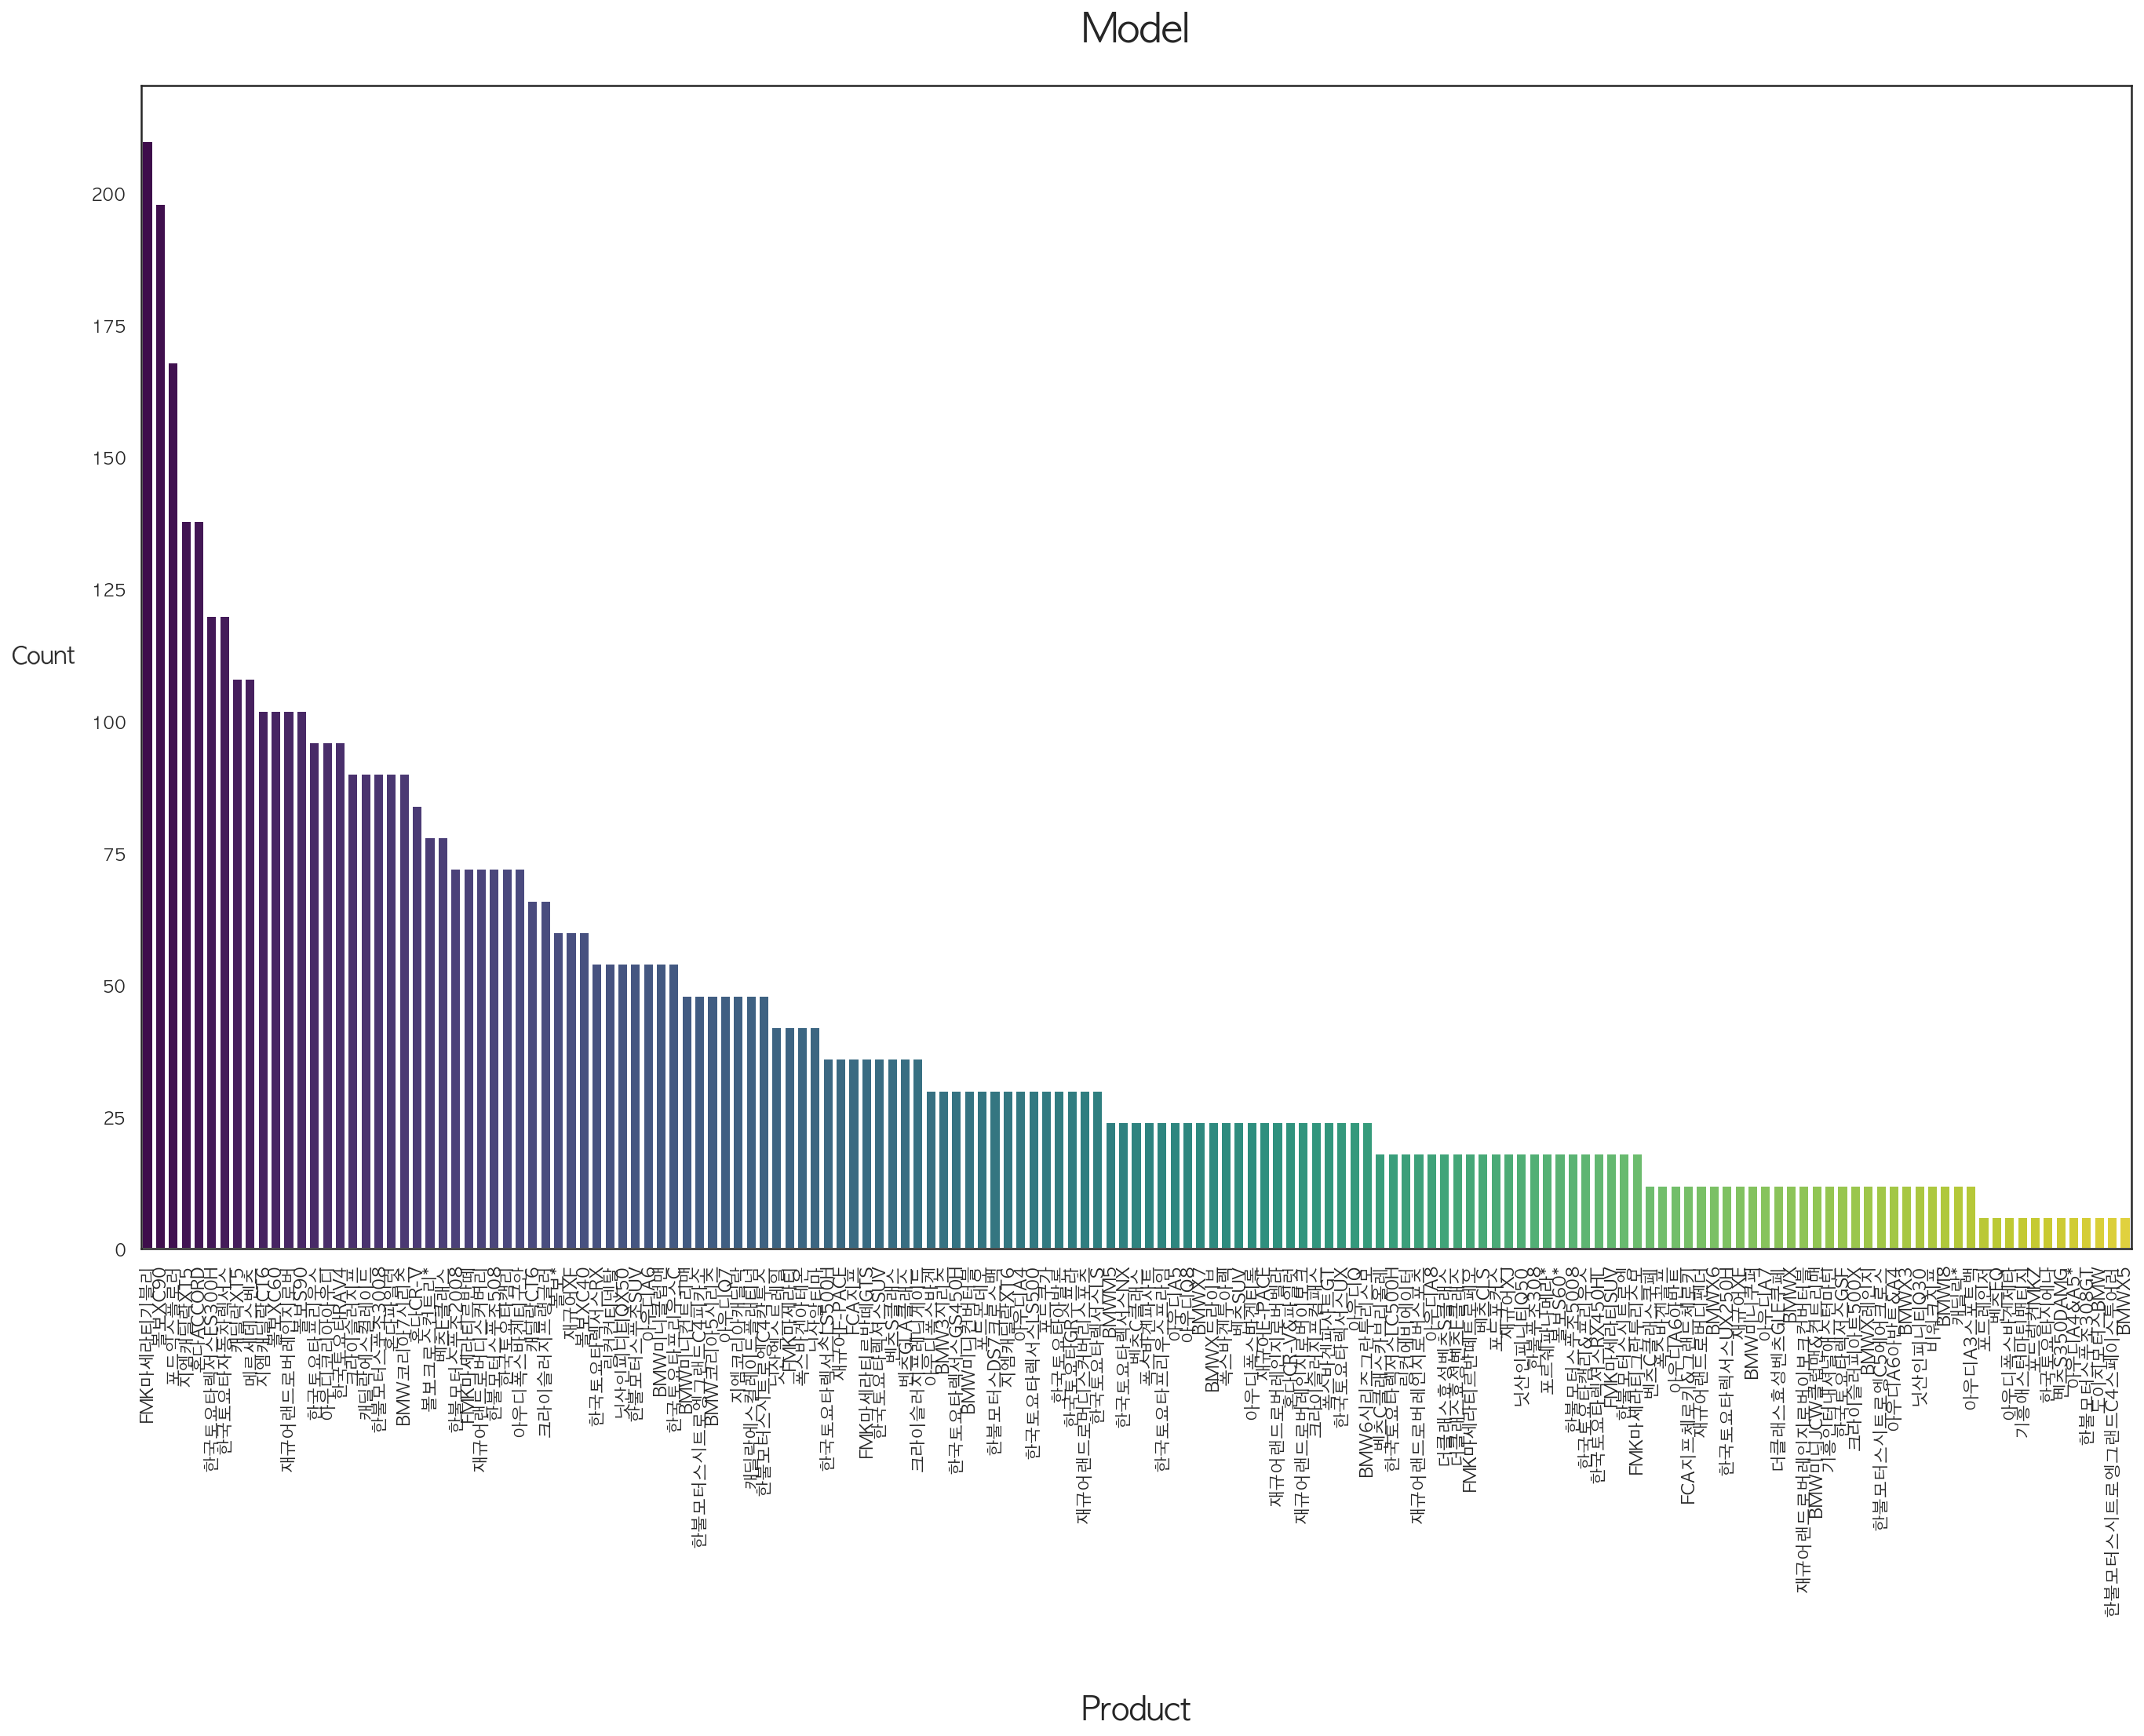

In [46]:
%matplotlib inline
plt.figure(figsize=(50, 30))     
plt.subplot(221)  

sns.barplot(data=pd.DataFrame(data1['Product'].value_counts()).sort_values(by='Product', ascending=False).T,
           palette='viridis', ci=False)     

plt.title('Model', fontsize=25, y=1.03)       
plt.xlabel('Product', fontsize=20, labelpad=50)                         
plt.ylabel('Count', fontsize=15, rotation=1, labelpad=30)  
plt.xticks(rotation=90)

plt.show()

- 자동차 모델로 보았을 때 마세라티가 가장 많아 보인다. 
- 하지만 해당 자료도 중복되어 있는 데이터가 많기에 전처리 과정을 거치고 보는 것이 타당하다고 판단된다.

In [47]:
pd.DataFrame(data1['연령대'].value_counts()).sort_index()

,연령대
20대,1049
30대,1049
40대,1049
50대,1049
60대,1049
개인,1049


- 데이터 프레임으로 연령대를 확인해본 결과 모두 같은 수로 나온다.
- 해당 데이터는 확인해보니 어떤 연령대일 경우 NaN 값과 0이 많으므로 전처리가 꼭 필요해보인다.

In [48]:
data1['평균노출빈도'] = data1['GRP'] / data1['도달율 1+']
data1['평균노출빈도']

0            NaN
1       1.000000
2       1.000000
3            NaN
4       1.000000
          ...   
6289    1.000000
6290    1.142857
6291    1.500000
6292    2.000000
6293    1.666667
Name: 평균노출빈도, Length: 6294, dtype: float64

In [49]:
data1['평균노출빈도'].fillna(0, inplace=True)
data1['평균노출빈도']

0       0.000000
1       1.000000
2       1.000000
3       0.000000
4       1.000000
          ...   
6289    1.000000
6290    1.142857
6291    1.500000
6292    2.000000
6293    1.666667
Name: 평균노출빈도, Length: 6294, dtype: float64

In [50]:
data1['평균노출빈도'].replace(np.inf, 0, inplace=True)
data1

,년,월,Advertiser,Brand,Product,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균노출빈도
0,2016,01월,BMW코리아,BMW,BMW미니클럽맨,20대,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000
1,2016,01월,BMW코리아,BMW,BMW미니클럽맨,30대,1,21000,0.5,21000,0.5,0.0,0.0,0.0,0.0,1.000000
2,2016,01월,BMW코리아,BMW,BMW미니클럽맨,40대,1,23840,0.6,23840,0.6,0.0,0.0,0.0,0.0,1.000000
3,2016,01월,BMW코리아,BMW,BMW미니클럽맨,50대,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000
4,2016,01월,BMW코리아,BMW,BMW미니클럽맨,60대,1,5638,0.2,5638,0.2,0.0,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,2020,10월,혼다코리아,혼다,혼다CR-V,30대,27,9939,0.3,9939,0.3,0.0,0.0,0.0,0.0,1.000000
6290,2020,10월,혼다코리아,혼다,혼다CR-V,40대,27,32944,0.8,27119,0.7,0.0,0.0,0.0,0.0,1.142857
6291,2020,10월,혼다코리아,혼다,혼다CR-V,50대,27,35197,0.9,25964,0.6,0.0,0.0,0.0,0.0,1.500000
6292,2020,10월,혼다코리아,혼다,혼다CR-V,60대,27,36975,0.8,19556,0.4,0.1,0.1,0.0,0.0,2.000000


In [51]:
data1['평균시청률'] = data1['GRP'] / data1['광고횟수']
data1['평균시청률']

0       0.000000
1       0.500000
2       0.600000
3       0.000000
4       0.200000
          ...   
6289    0.011111
6290    0.029630
6291    0.033333
6292    0.029630
6293    0.018519
Name: 평균시청률, Length: 6294, dtype: float64

In [52]:
data1['평균시청률'].replace(np.inf, 0, inplace=True)
data1.tail()

,년,월,Advertiser,Brand,Product,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균노출빈도,평균시청률
6289,2020,10월,혼다코리아,혼다,혼다CR-V,30대,27,9939,0.3,9939,0.3,0.0,0.0,0.0,0.0,1.000000,0.011111
6290,2020,10월,혼다코리아,혼다,혼다CR-V,40대,27,32944,0.8,27119,0.7,0.0,0.0,0.0,0.0,1.142857,0.029630
6291,2020,10월,혼다코리아,혼다,혼다CR-V,50대,27,35197,0.9,25964,0.6,0.0,0.0,0.0,0.0,1.500000,0.033333
6292,2020,10월,혼다코리아,혼다,혼다CR-V,60대,27,36975,0.8,19556,0.4,0.1,0.1,0.0,0.0,2.000000,0.029630
6293,2020,10월,혼다코리아,혼다,혼다CR-V,개인,27,115055,0.5,82280,0.3,0.0,0.0,0.0,0.0,1.666667,0.018519


In [53]:
ad_age = data1.groupby(["Advertiser", "연령대"]).agg('mean').round(6)[['GRP', '평균시청률', '평균노출빈도']].reset_index()
ad_age.tail()

,Advertiser,연령대,GRP,평균시청률,평균노출빈도
127,혼다코리아,30대,28.196429,0.434702,1.525901
128,혼다코리아,40대,50.917857,0.773733,1.840891
129,혼다코리아,50대,58.366071,0.860406,1.964544
130,혼다코리아,60대,55.069643,0.664354,1.921900
131,혼다코리아,개인,38.912500,0.546491,1.834624


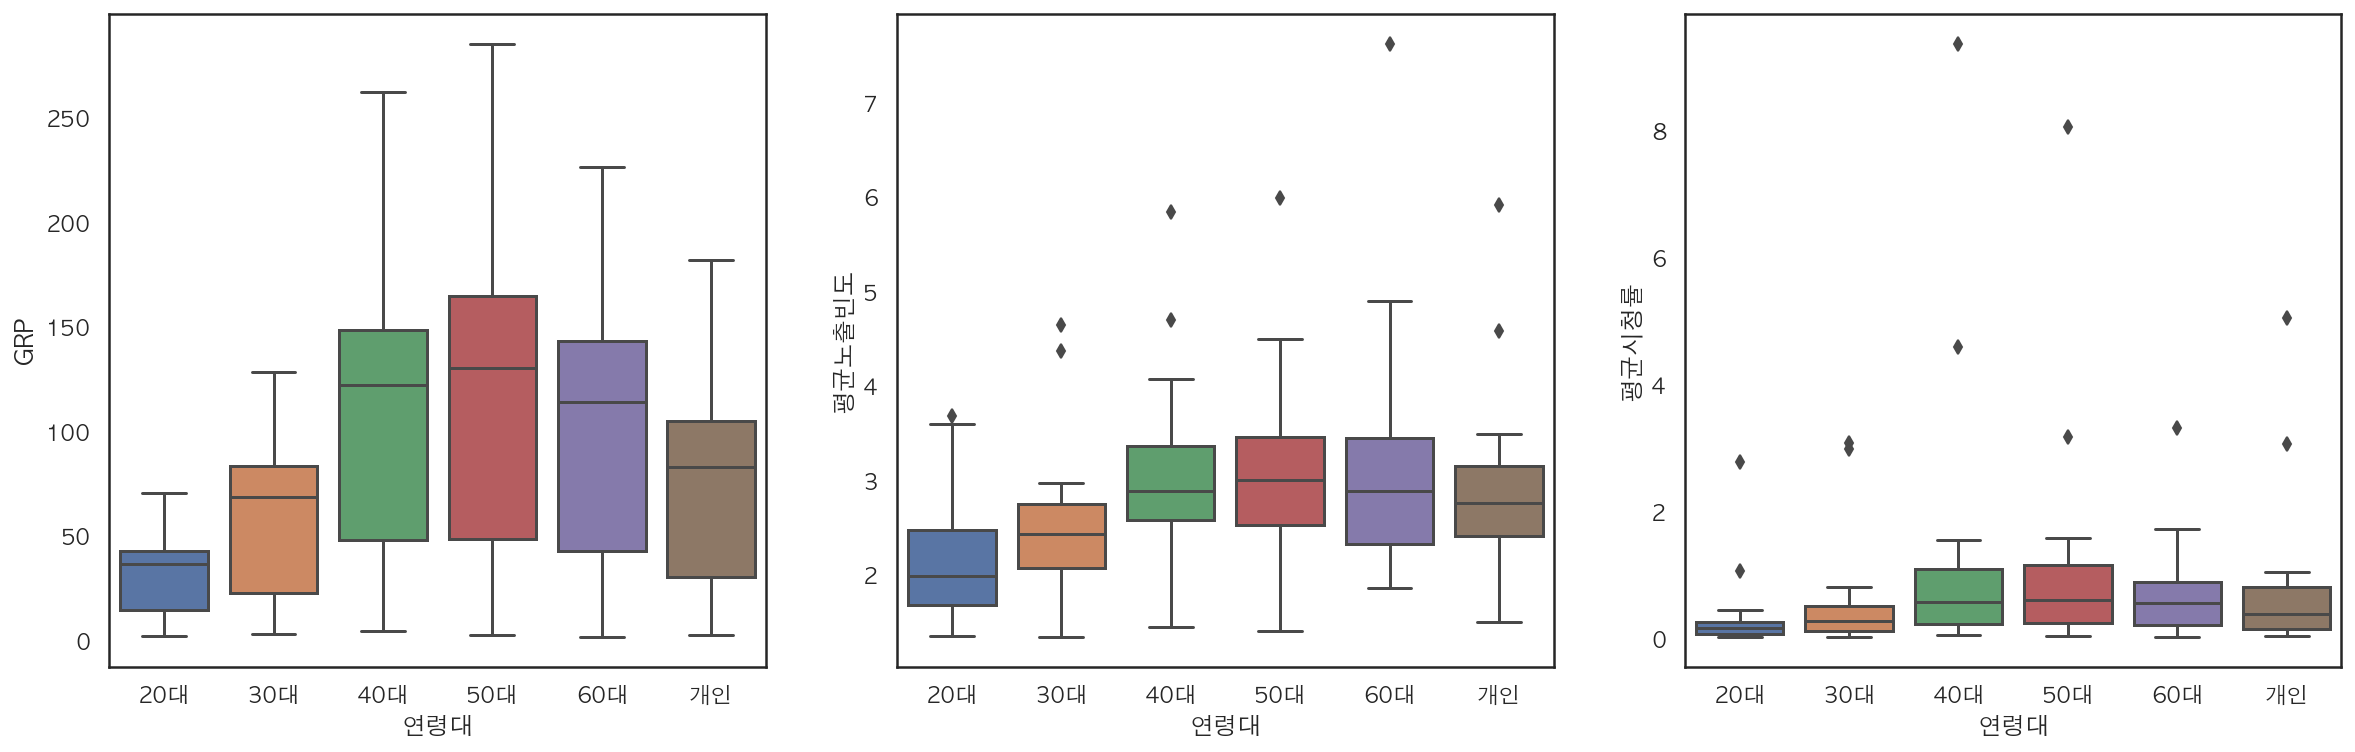

In [54]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(data=ad_age, x='연령대', y='GRP')

plt.subplot(132)
sns.boxplot(data=ad_age, x="연령대", y='평균노출빈도')

plt.subplot(133)
sns.boxplot(data=ad_age, x="연령대", y='평균시청률')

plt.show()

- 연령대 대비 GRP(광고 캠페인 누적시청률), 평균노출빈도, 평균시청률을 보았을 때 40대, 50대, 60대가 많다.
- 하지만 평균노출빈도와 평균시청률에 다수의 아웃라이어(특이점)가 존재, 이 특이점들이 무엇인지 파악하고, 어떻게 처리할 것인지 논의가 필요함.

### Trouble Shouting
- 1. 회사(광고주)별로 중복되어 있는 브랜드가 많다 (예를 들면 BMW 브랜드 기준으로 BMW코리아와 도이치모터스 두 회사명이 존재) 하나로 같이 묶어야할 지 따로 봐야할지 정말 복잡함. 논의가 필요함.
- 2. Product 컬럼을 보면 앞에 회사 상호명과 같이 광고를 했던 모델 및 회사가 raw값으로 있다. 광고를 한 회사는 상관 없지만,모델명까지 상호명을 같이 붙여야할지도 논의가 필요해보인다.
- 3. 마지막 Boxplot을 보면 평균노출빈도와 평균시청률에서 아웃라이어(특이점)이 보인다. 해당 아웃라이어가 어떤 것인지 보고 어떻게 처리할 것인지 논의가 필요해보인다. 